In [1]:
import numpy as np
import os
import h5py
from getdist import plots, MCSamples
import getdist
import dynesty 
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc
import pickle

import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize,
         'figure.facecolor': 'w'}
pylab.rcParams.update(params)
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2
import plotter
import utils
import emulator
from chain_variables import *

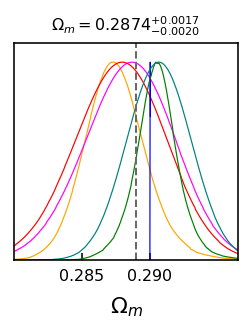

In [2]:
chaintags = ['wp_c3h3_omegam_dy_glamcov',
             'wp_c3h3_omegam_dy_glamicov',
             'wp_c3h3_omegam_dy_glamicovsvd_fracdiverr',
             'wp_c3h3_omegam_dy_glamicovsvd_absdiverr',
             'wp_c3h3_omegam_dy_emuaemcov',
             'wp_c3h3_omegam_dy_emuaemicovsvd',
            ]
legend_labels = ['wp (C_test,glam)',
                 'wp (inverse C_test,glam)',
                 'wp (inverse svd frac C_test,glam)'
                 'wp (inverse svd abs C_test,glam)'
                 'wp (C_emuaem)'
                 'wp (inverse svd C_emuaem)'
                ]
colors = ['orange',
          'magenta',
          'red',
          'blue',
          'green',
          'teal'
         ]
g = plotter.plot_contours_dynesty(chaintags, legend_labels=legend_labels,
                      colors=colors)
g.legend.remove()

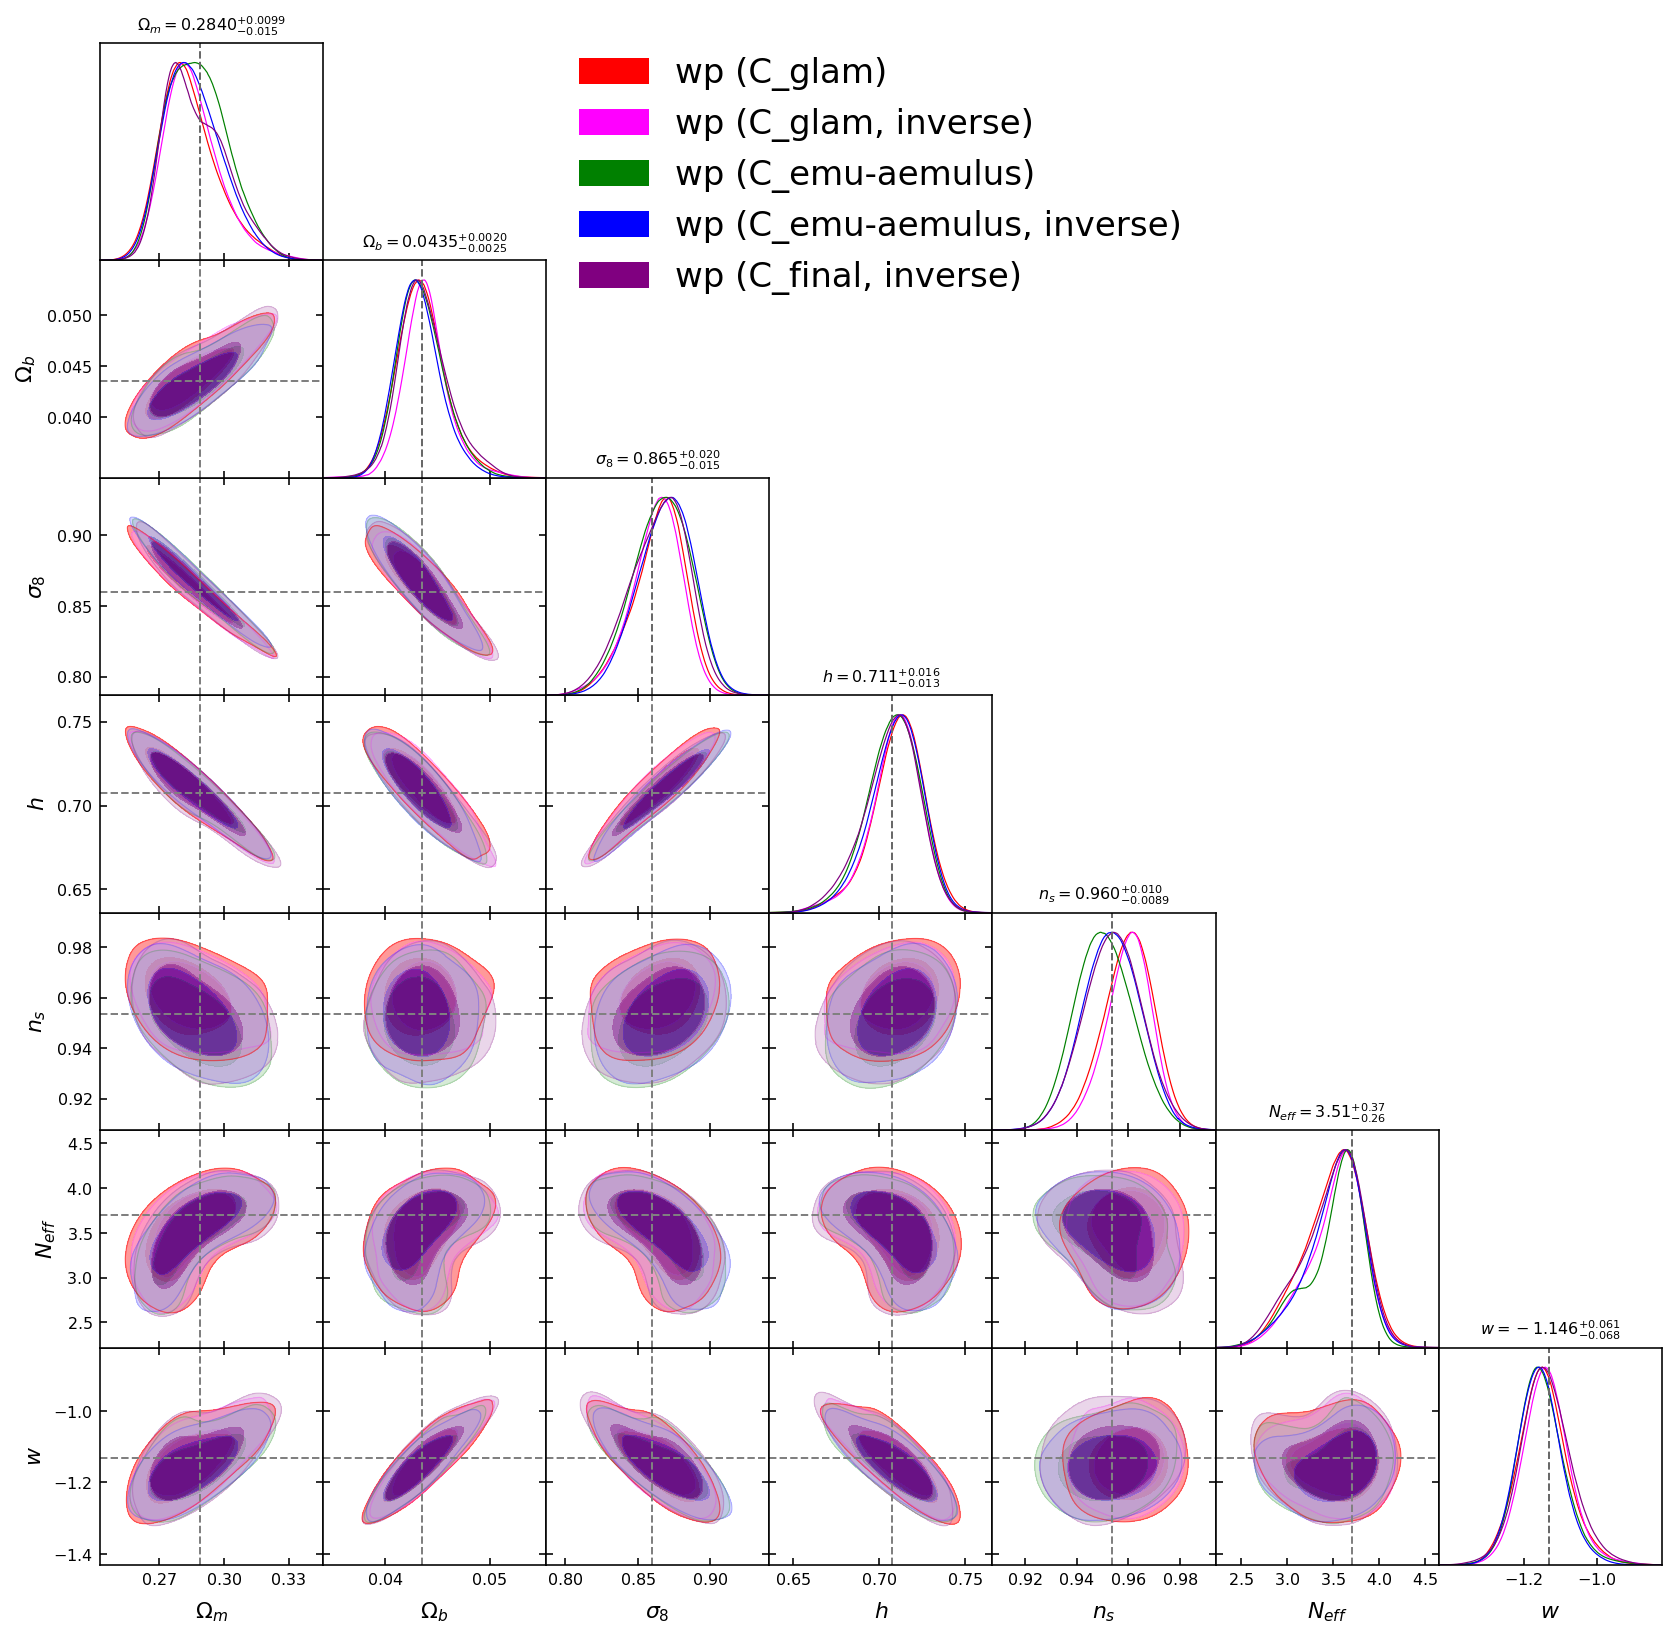

In [9]:
chaintags = [
             'wp_c3h3_allcosmo_dy_glamcov',
             'wp_c3h3_allcosmo_dy_glamicovsvd',
             'wp_c3h3_allcosmo_dy_emuaemcov',
             'wp_c3h3_allcosmo_dy_emuaemicovsvd',
             #'wp_c3h3_allcosmo_dy_finalcov',
             'wp_c3h3_allcosmo_dy_finalicovsvd',
            ]
legend_labels = [
                 'wp (C_glam)',
                 'wp (C_glam, inverse)',
                 'wp (C_emu-aemulus)',
                 'wp (C_emu-aemulus, inverse)',
                 #'wp (C_final)',
                 'wp (C_final, inverse)'
                ]
colors = ['red',
          'magenta',
          'green',
          'blue',
          #'grey',
          'purple'
         ]
g = plotter.plot_contours_dynesty(chaintags, legend_labels=legend_labels,
                      colors=colors)

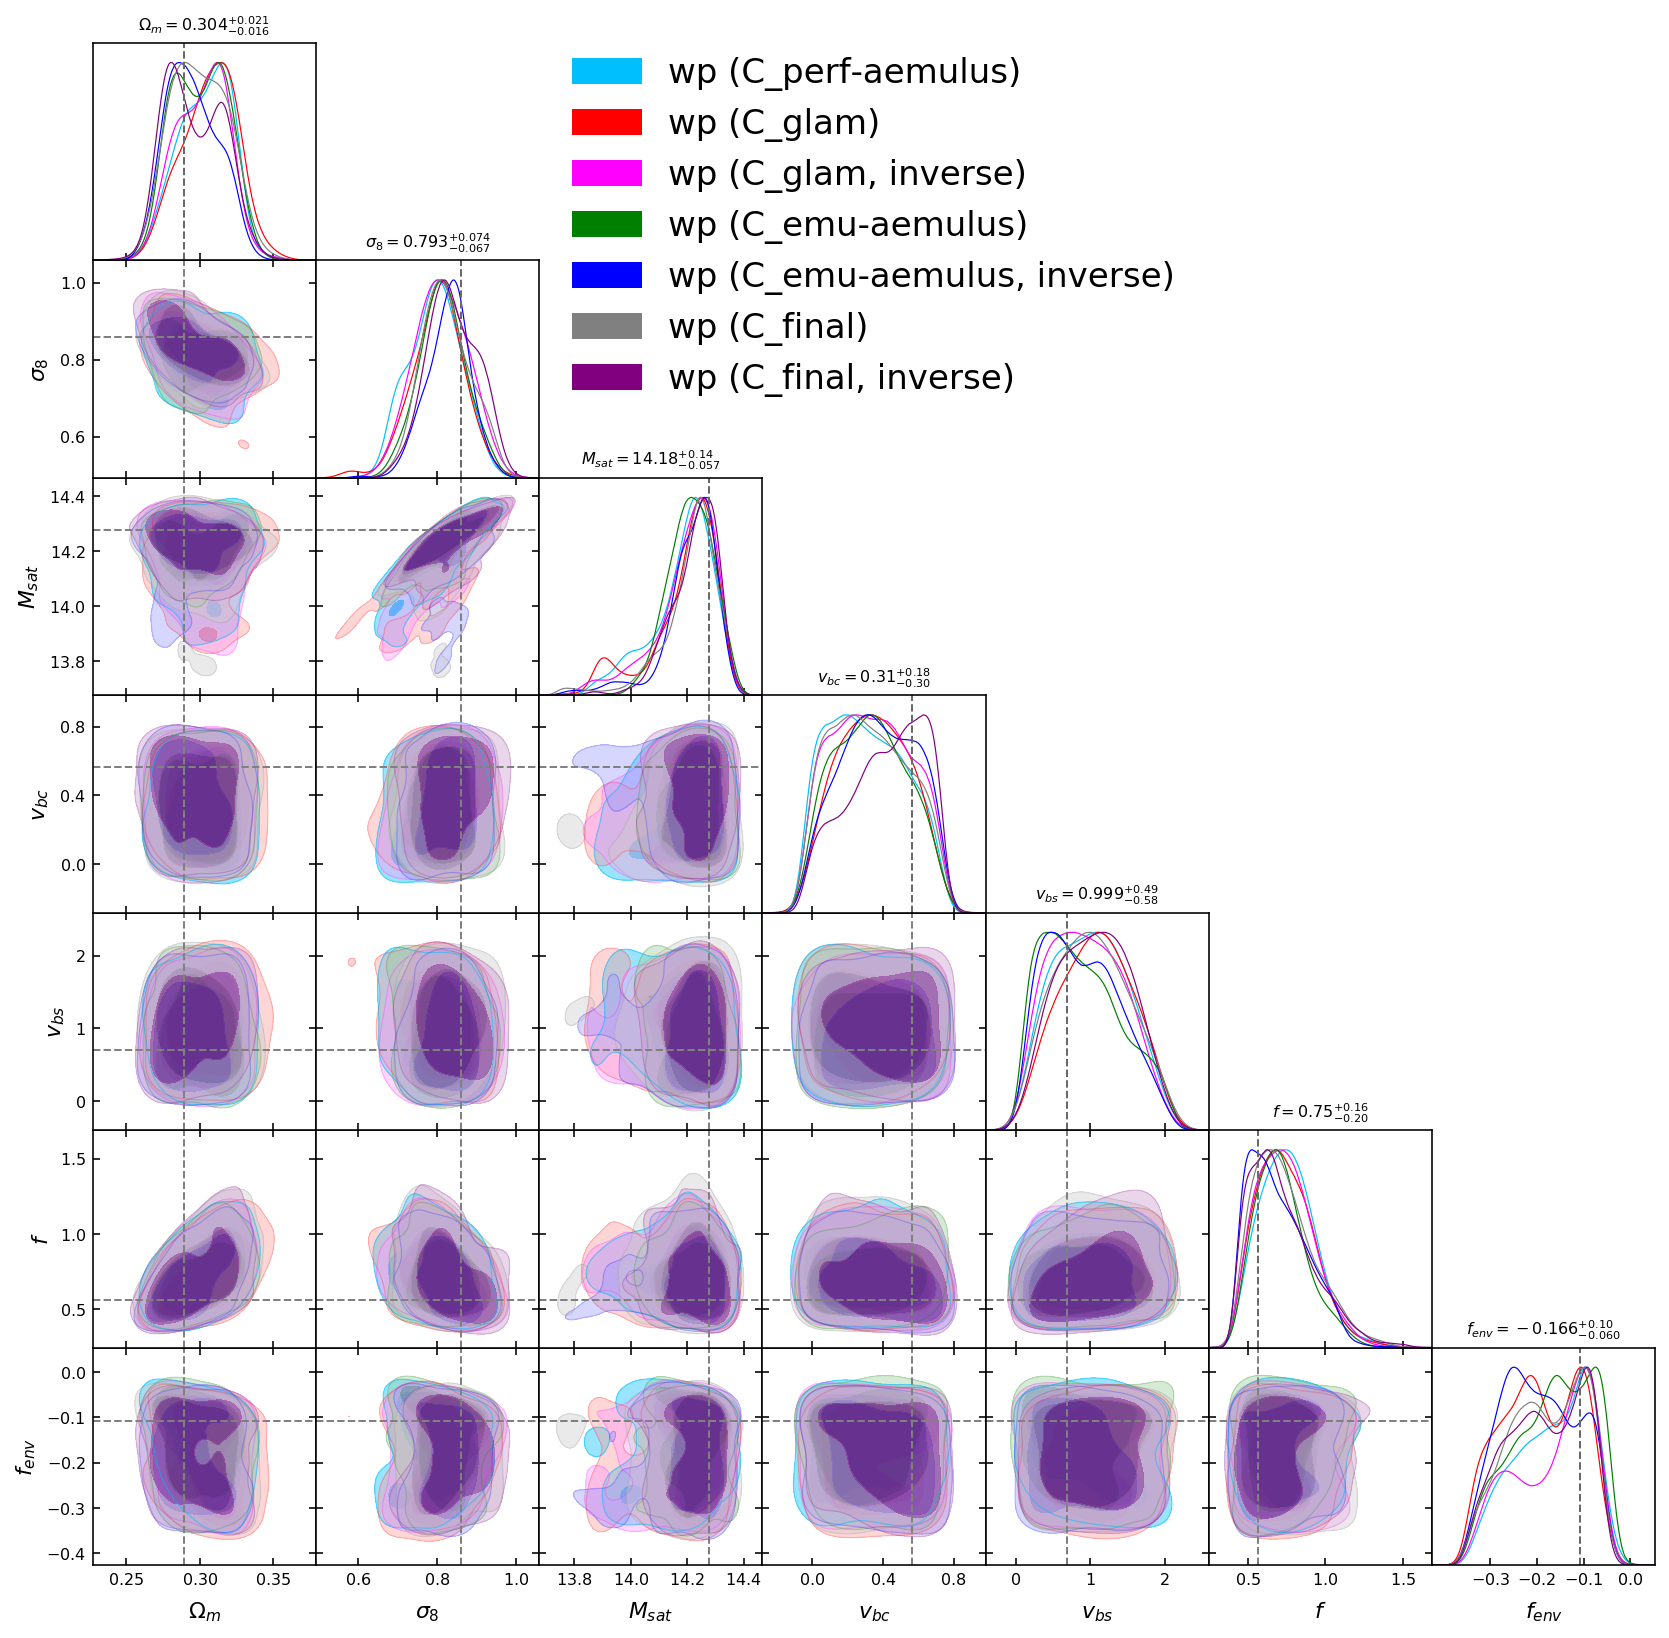

In [3]:
chaintags = ['wp_c3h3_all_dy',
             'wp_c3h3_all_dy_glamcov',
             'wp_c3h3_all_dy_glamicovsvd',
             'wp_c3h3_all_dy_emuaemcov',
             'wp_c3h3_all_dy_emuaemicovsvd',
             'wp_c3h3_all_dy_finalcov',
             'wp_c3h3_all_dy_finalicovsvd',
            ]
legend_labels = ['wp (C_perf-aemulus)',
                 'wp (C_glam)',
                 'wp (C_glam, inverse)',
                 'wp (C_emu-aemulus)',
                 'wp (C_emu-aemulus, inverse)',
                 'wp (C_final)',
                 'wp (C_final, inverse)',
                ]
colors = [cwp,
          'red',
          'magenta',
          'green',
          'blue',
          'grey',
          'purple'
         ]
g = plotter.plot_contours_dynesty(chaintags, legend_labels=legend_labels,
                      colors=colors, params_toplot=key_params)

In [21]:
f = h5py.File('/home/users/ksf293/emulator/chains/chains_wp_c3h3_allcosmo_dy_finalicovsvd.h5', 'r')
print(f.attrs.keys())
print(f.attrs['param_names'])
print(f.attrs['true_values'])
print(f.attrs['fixed_param_names'])
print(f.attrs['fixed_param_values'])
print(f['chain'].shape)

<KeysViewHDF5 ['cosmo', 'cov_fn', 'covariance_matrix', 'dlogz', 'errtag', 'fixed_param_names', 'fixed_param_values', 'hod', 'icov_fn', 'inverse_covariance_matrix', 'kernel_name', 'log', 'mean', 'multi', 'nbins', 'nburn', 'nhod', 'nlive', 'nsteps', 'nwalkers', 'param_names', 'seed', 'statistic', 'tag', 'testtag', 'traintag', 'true_values', 'ys']>
['Omega_m' 'Omega_b' 'sigma_8' 'h' 'n_s' 'N_eff' 'w']
[ 0.289014   0.0434999  0.859613   0.707317   0.953515   3.7
 -1.13151  ]
['M_sat' 'alpha' 'M_cut' 'sigma_logM' 'v_bc' 'v_bs' 'c_vir' 'f' 'f_env'
 'delta_env' 'sigma_env']
[14.27600935  1.438172   12.41536871  0.2861269   0.5629193   0.6943786
  1.906767    0.5601679  -0.1069814   1.687248    0.8692401 ]
(1, 1708, 7)


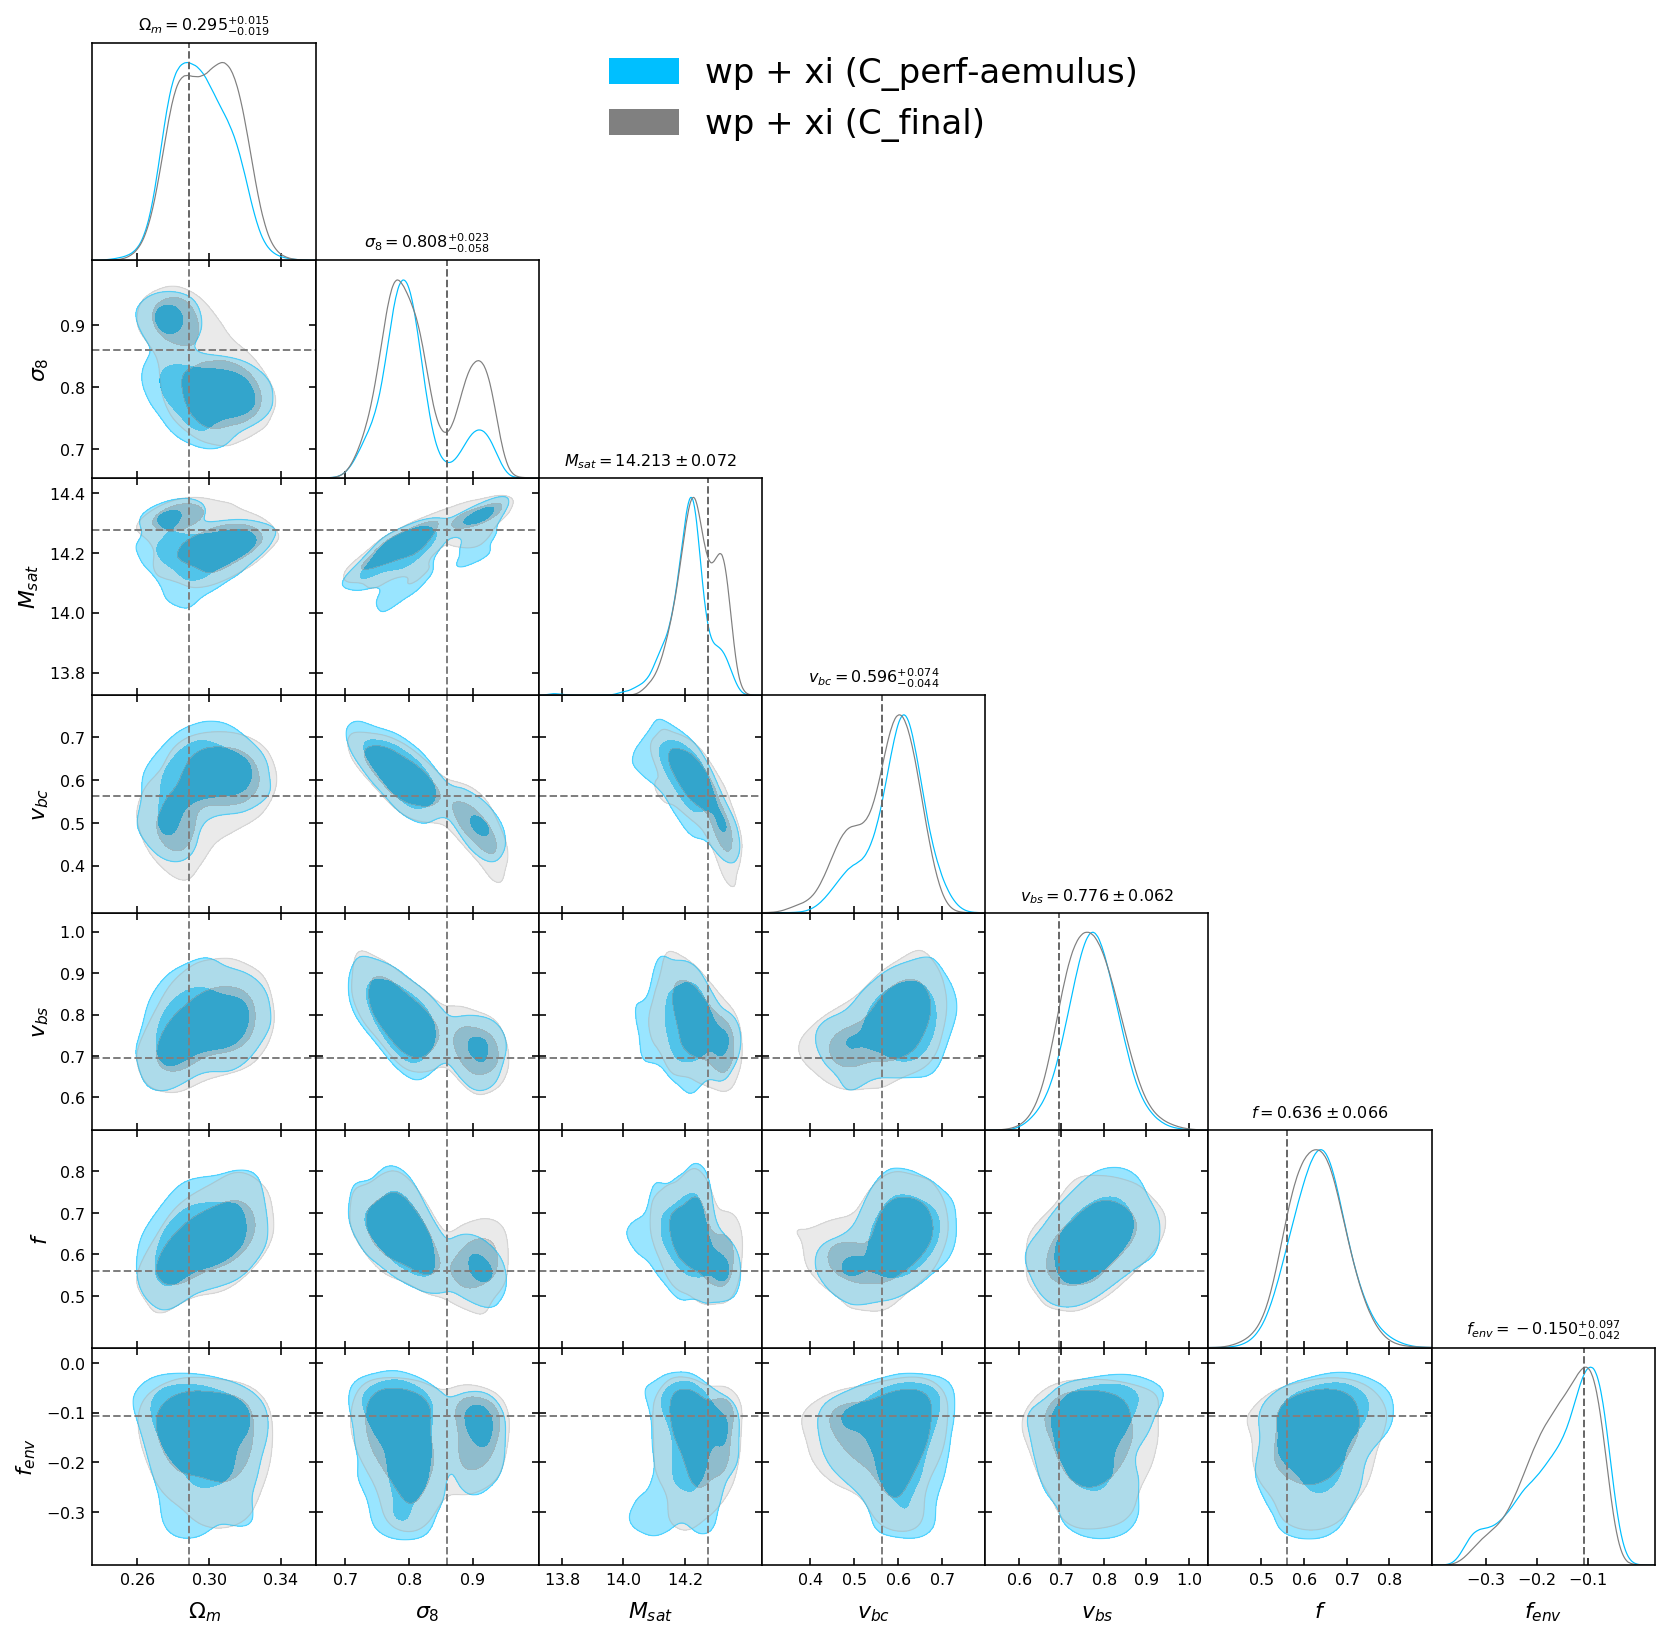

In [4]:
chaintags = ['wp_xi_c3h3_all_dy',
             'wp_xi_c3h3_all_dy_finalcov',
             #'wp_xi_c3h3_all_dy_finalicov',
            ]
legend_labels = ['wp + xi (C_perf-aemulus)',
                 'wp + xi (C_final)',
                 #'wp + xi (C_final, inverse)',
                ]
colors = [cwp,
          'grey',
          #'purple'
         ]
g = plotter.plot_contours_dynesty(chaintags, legend_labels=legend_labels,
                      colors=colors, params_toplot=key_params)

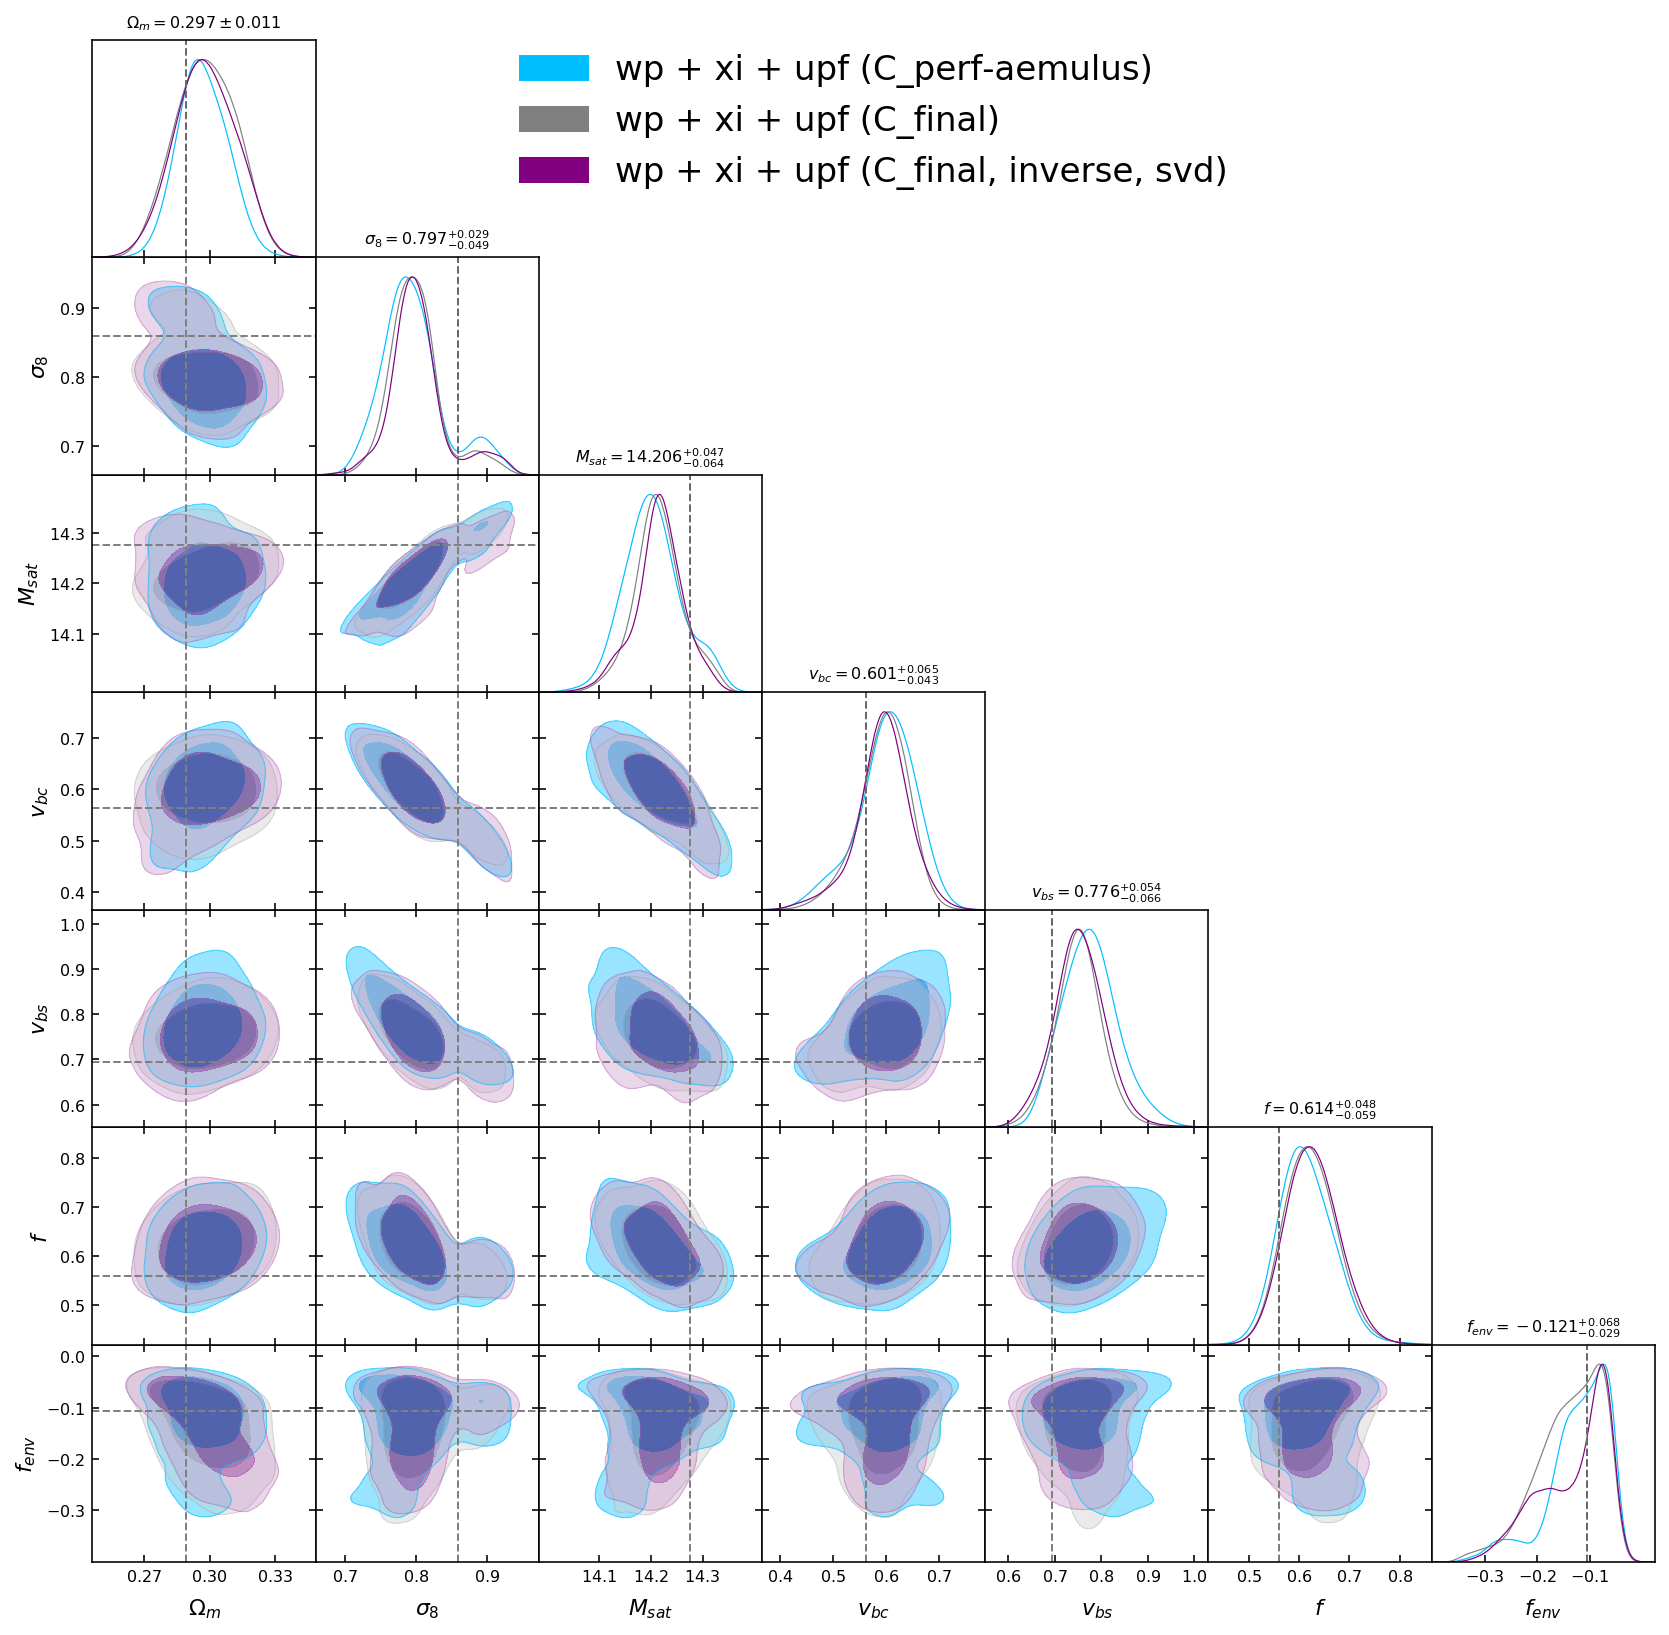

In [5]:
chaintags = ['wp_xi_upf_c3h3_all_dy',
             'wp_xi_upf_c3h3_all_dy_finalcov',
             'wp_xi_upf_c3h3_all_dy_finalicovsvd',
            ]
legend_labels = ['wp + xi + upf (C_perf-aemulus)',
                 'wp + xi + upf (C_final)',
                 'wp + xi + upf (C_final, inverse, svd)',
                ]
colors = [cwp,
          'grey',
          'purple'
         ]
g = plotter.plot_contours_dynesty(chaintags, legend_labels=legend_labels,
                      colors=colors, params_toplot=key_params)

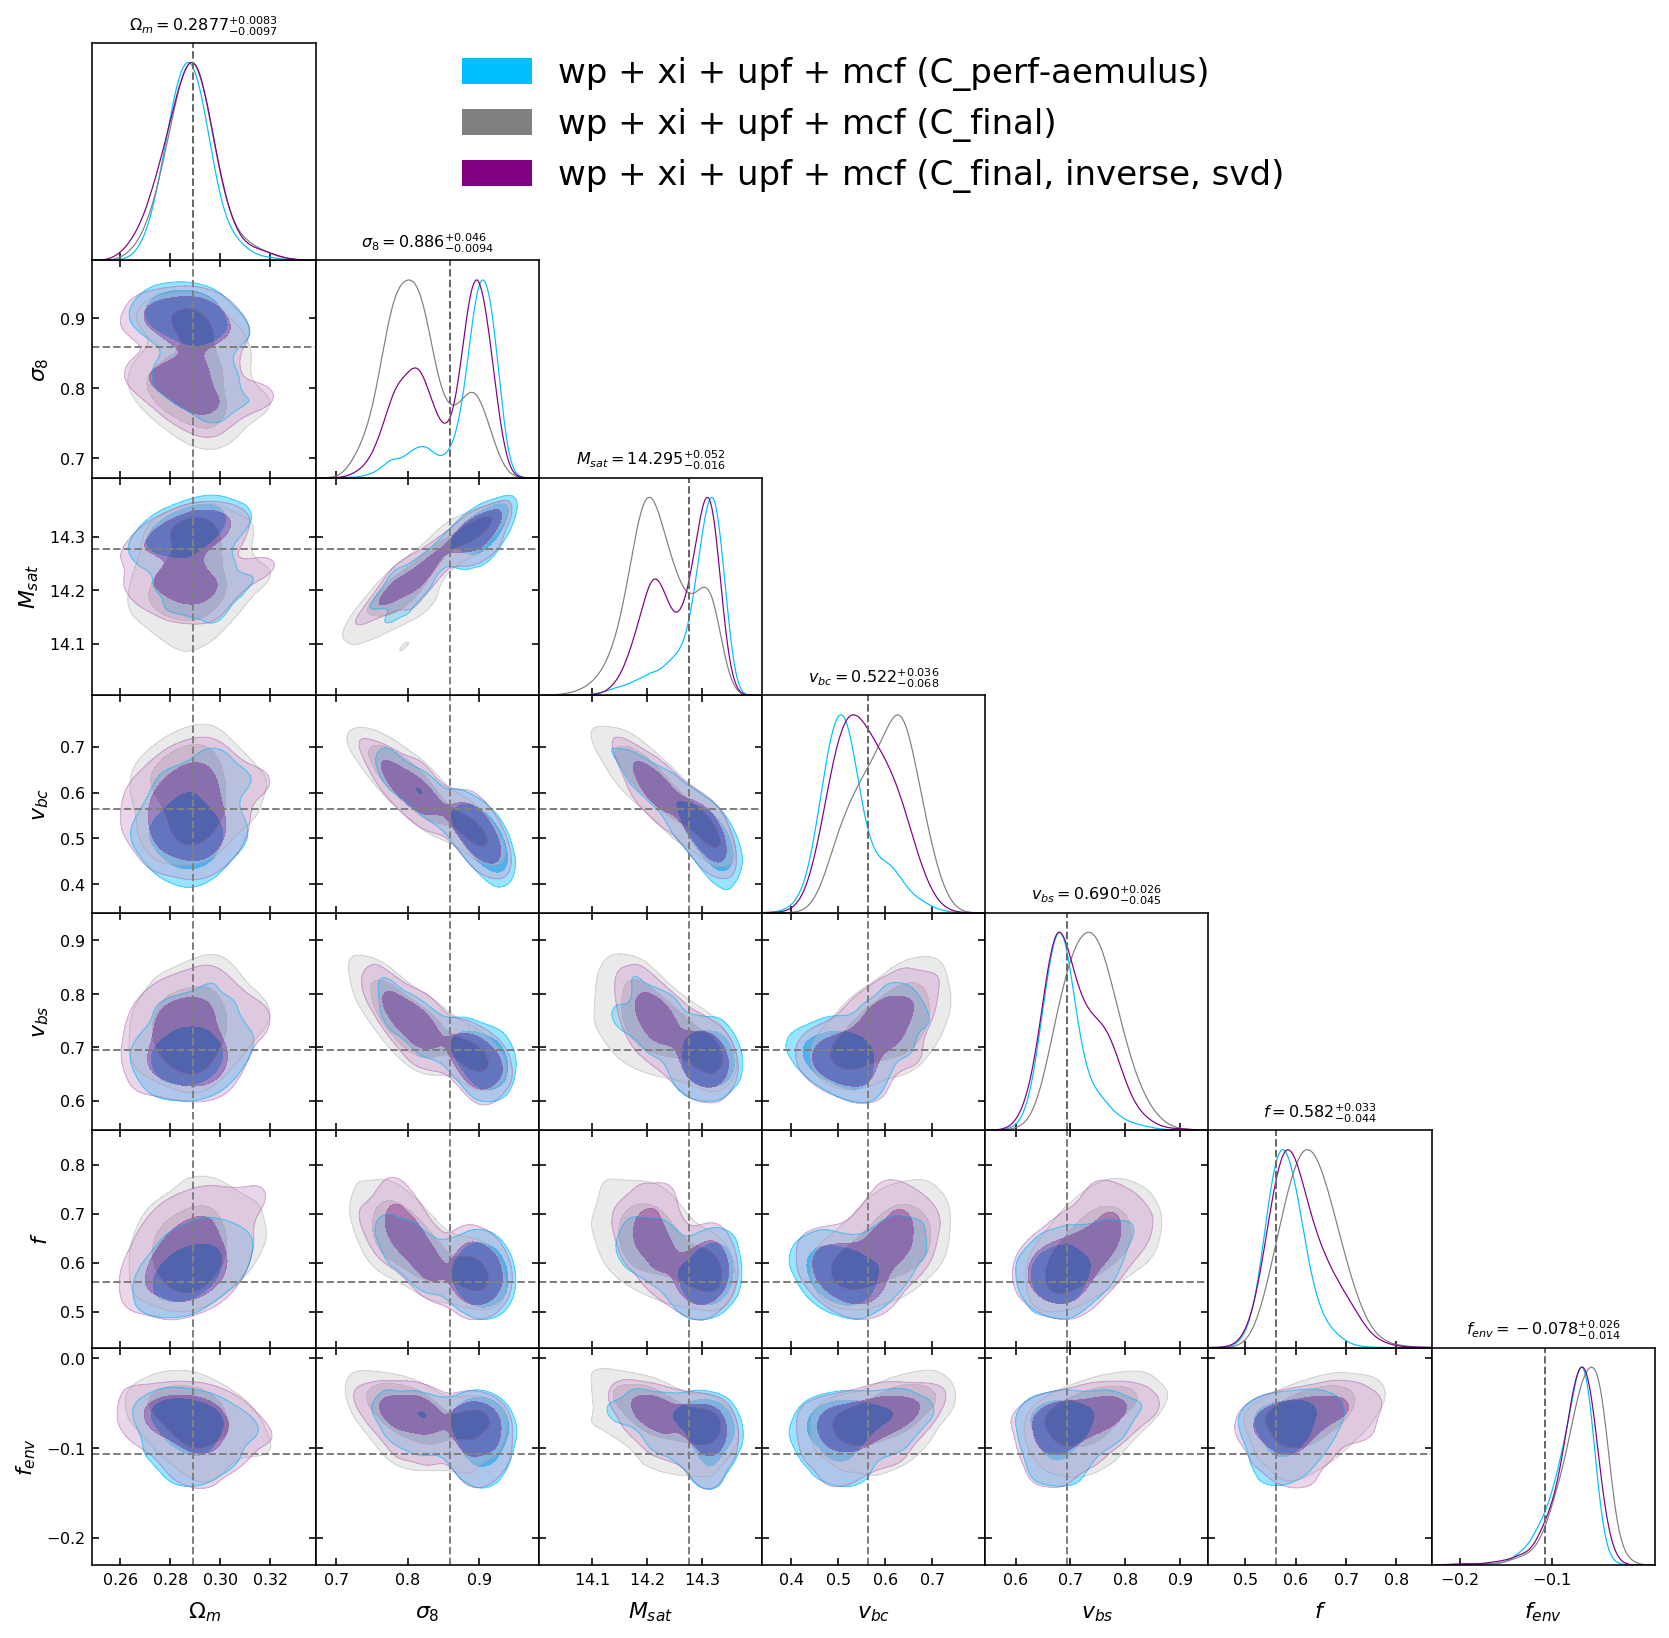

In [6]:
chaintags = ['wp_xi_upf_mcf_c3h3_all_dy',
             'wp_xi_upf_mcf_c3h3_all_dy_finalcov',
             'wp_xi_upf_mcf_c3h3_all_dy_finalicovsvd',
            ]
legend_labels = ['wp + xi + upf + mcf (C_perf-aemulus)',
                 'wp + xi + upf + mcf (C_final)',
                 'wp + xi + upf + mcf (C_final, inverse, svd)',
                ]
colors = [cwp,
          'grey',
          'purple'
         ]
g = plotter.plot_contours_dynesty(chaintags, legend_labels=legend_labels,
                      colors=colors, params_toplot=key_params)

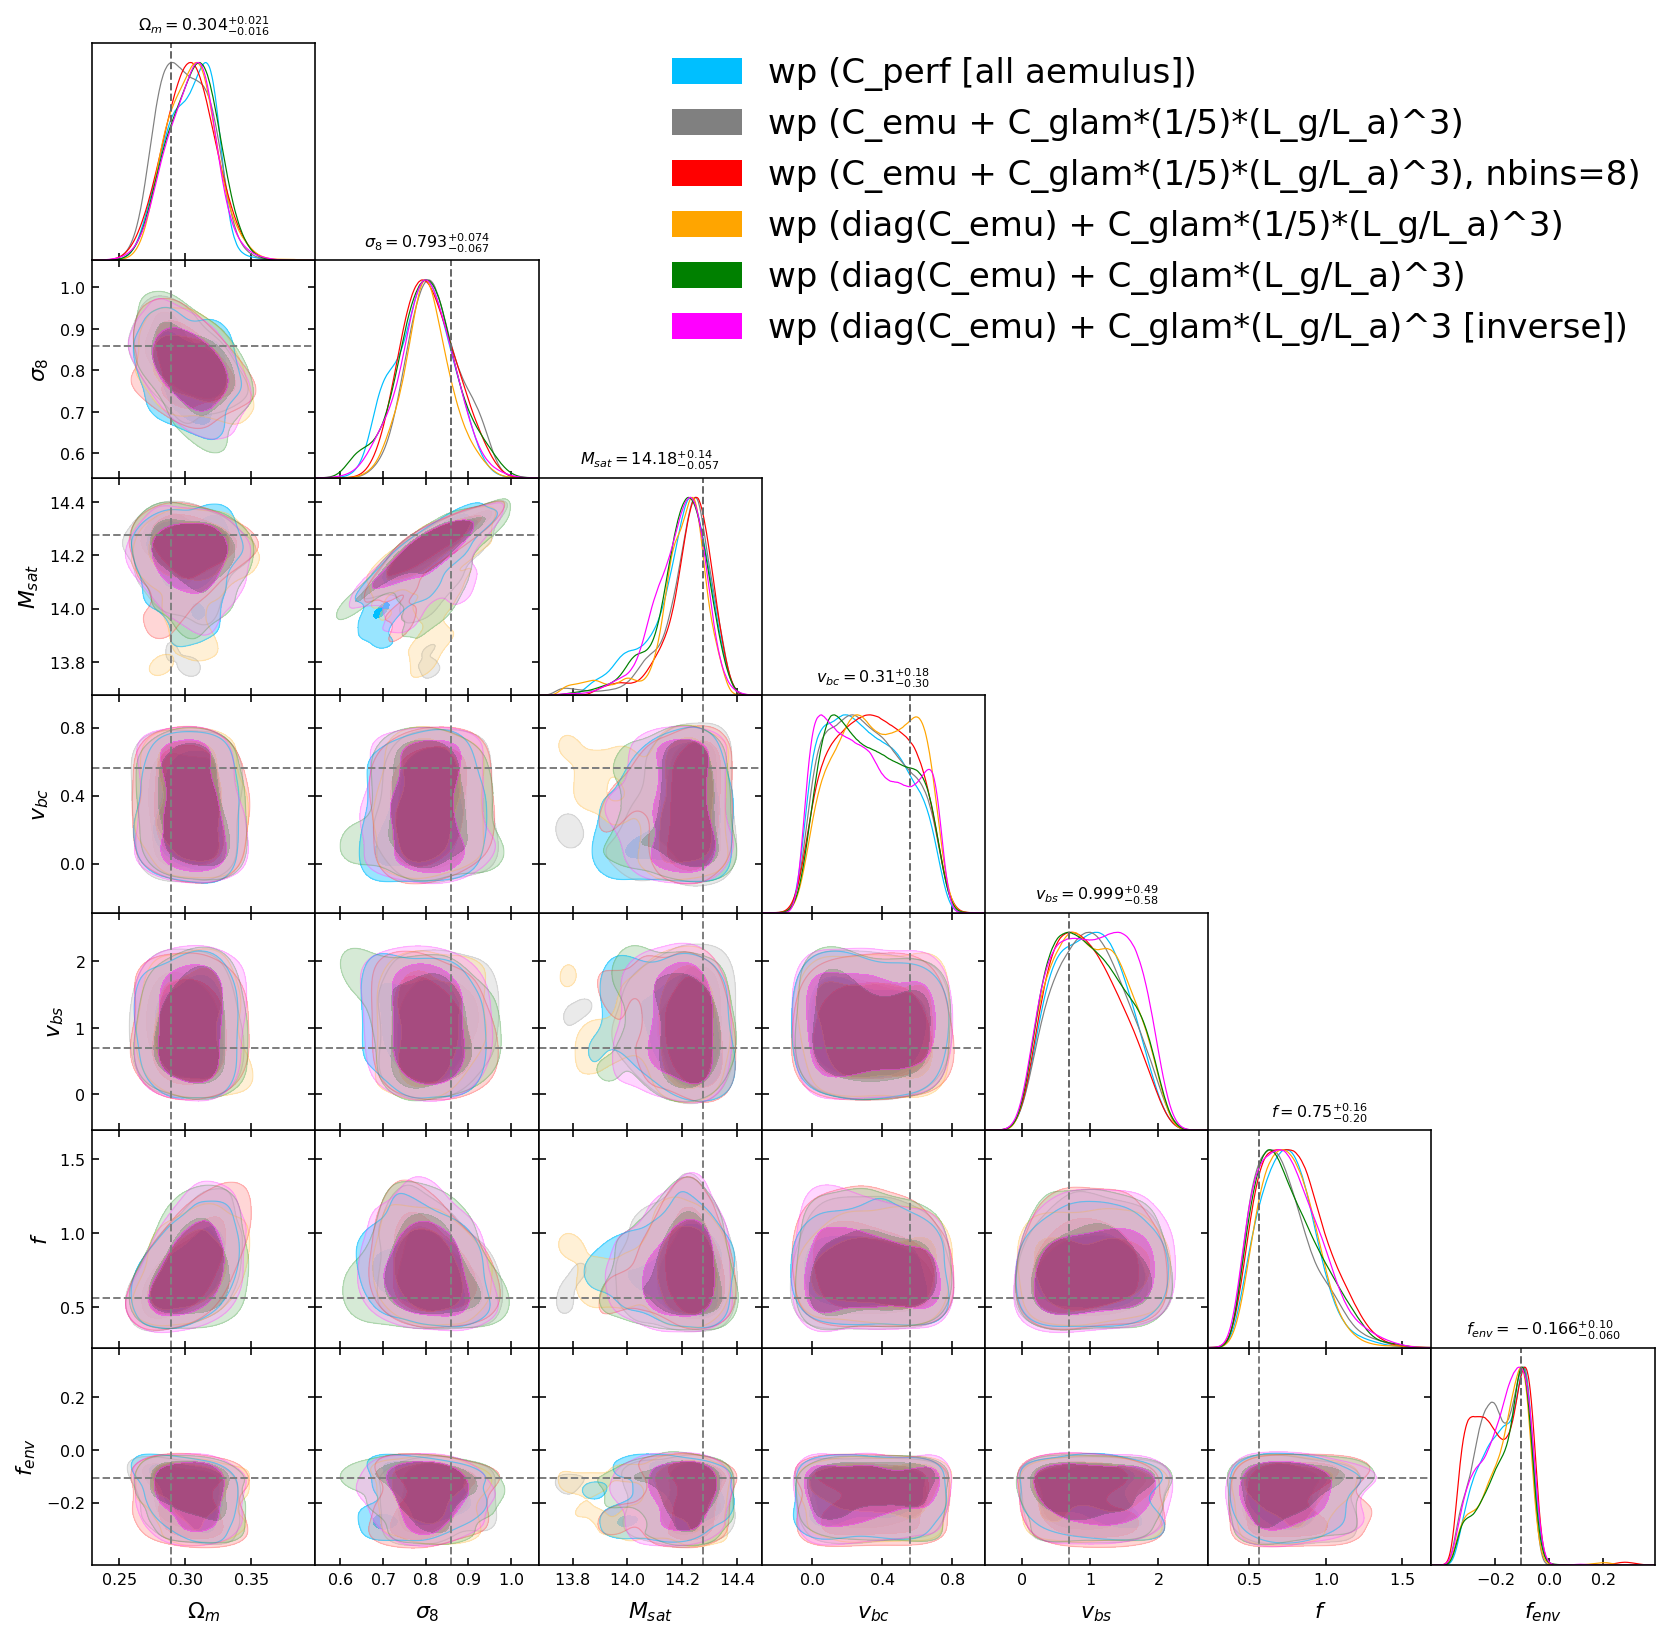

In [8]:
chaintags = ['wp_c3h3_all_dy',
             'wp_c3h3_all_dy_finalcov',
             'wp_c3h3_all_dy_finalcov_nbins8',
             'wp_c3h3_all_dy_glamemudiagcov',
             'wp_c3h3_all_dy_glamemudiagnoBcov',
             'wp_c3h3_all_dy_glamemudiagnoBicov'
            ]
legend_labels = ['wp (C_perf [all aemulus])',
                 'wp (C_emu + C_glam*(1/5)*(L_g/L_a)^3)',
                 'wp (C_emu + C_glam*(1/5)*(L_g/L_a)^3), nbins=8)',
                 'wp (diag(C_emu) + C_glam*(1/5)*(L_g/L_a)^3)',
                 'wp (diag(C_emu) + C_glam*(L_g/L_a)^3)',
                 'wp (diag(C_emu) + C_glam*(L_g/L_a)^3 [inverse])',
                ]
colors = [cwp,
          'grey',
          'red',
          'orange',
          'green',
          'magenta'
         ]
g = plotter.plot_contours_dynesty(chaintags, legend_labels=legend_labels,
                      colors=colors, params_toplot=key_params, legend_loc='upper right')

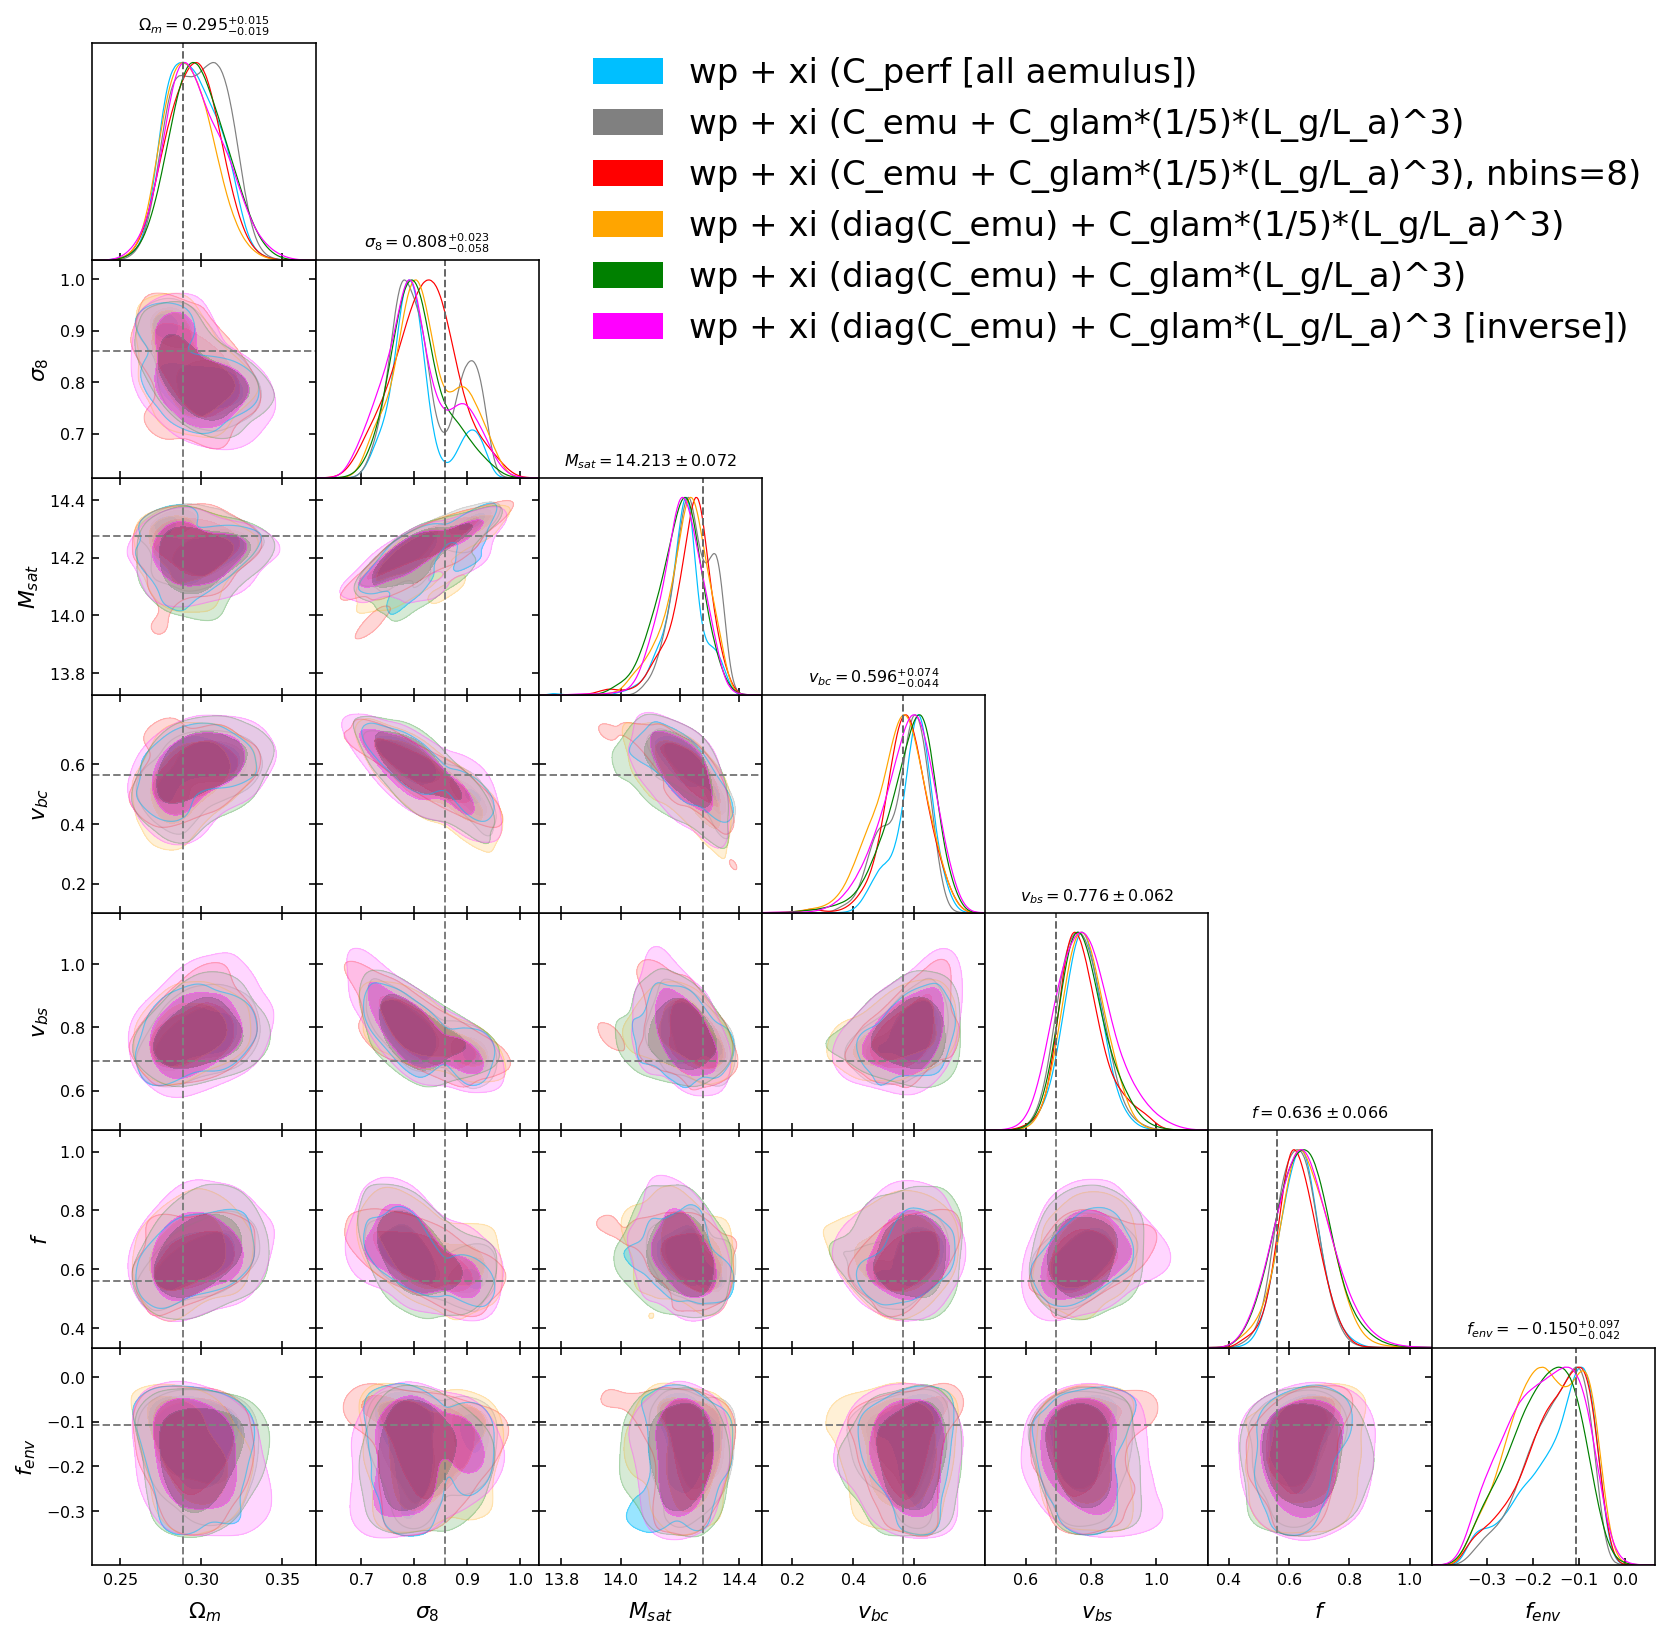

In [9]:
chaintags = ['wp_xi_c3h3_all_dy',
             'wp_xi_c3h3_all_dy_finalcov',
             'wp_xi_c3h3_all_dy_finalcov_nbins8',
             'wp_xi_c3h3_all_dy_glamemudiagcov',
             'wp_xi_c3h3_all_dy_glamemudiagnoBcov',
             'wp_xi_c3h3_all_dy_glamemudiagnoBicov'
            ]
legend_labels = ['wp + xi (C_perf [all aemulus])',
                 'wp + xi (C_emu + C_glam*(1/5)*(L_g/L_a)^3)',
                 'wp + xi (C_emu + C_glam*(1/5)*(L_g/L_a)^3), nbins=8)',
                 'wp + xi (diag(C_emu) + C_glam*(1/5)*(L_g/L_a)^3)',
                 'wp + xi (diag(C_emu) + C_glam*(L_g/L_a)^3)',
                 'wp + xi (diag(C_emu) + C_glam*(L_g/L_a)^3 [inverse])',
                ]
colors = [cwp,
          'grey',
          'red',
          'orange',
          'green',
          'magenta'
         ]
g = plotter.plot_contours_dynesty(chaintags, legend_labels=legend_labels,
                      colors=colors, params_toplot=key_params, legend_loc='upper right')

In [11]:
lnlike_fn = '../products/likelihood_maps/like_test.npy'
lnlikeparams_fn = '../products/likelihood_maps/like_params.npy'
lnlike_grid = np.load(lnlike_fn)
p0, p1 = np.load(lnlikeparams_fn)
p0 = np.array(p0)
p1 = np.array(p1)

In [12]:
print(p0)

[0.2460299 0.2589647 0.2718995 0.2848343 0.2977691 0.3107039 0.3236387
 0.3365735 0.3495083 0.3624431]


[-2.  0.  2.  4.  6.  8. 10.]


([<matplotlib.axis.YTick at 0x7f6c9bf683c8>,
 <a list of 2 Text yticklabel objects>)

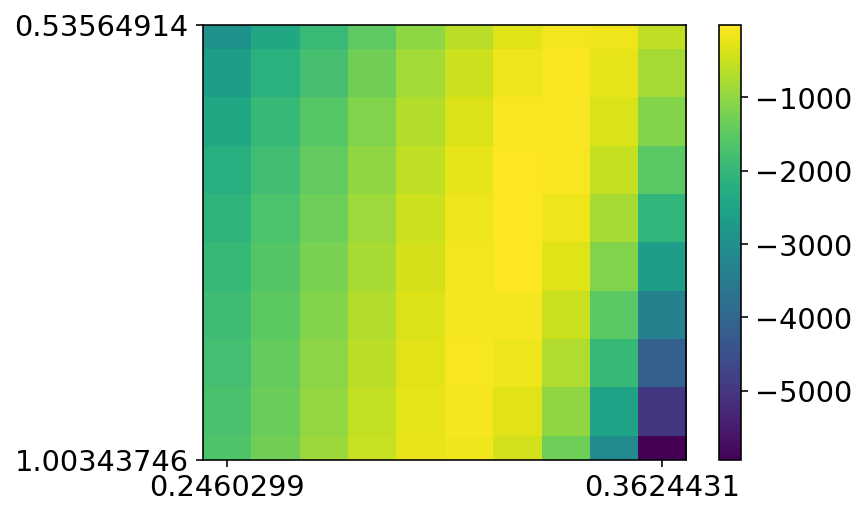

In [24]:
plt.imshow(lnlike_grid)
ax = plt.gca()
plt.colorbar()
ticks = ax.get_xticks()
plt.xticks(ticks=[0, len(p0)-1], labels=[p0[0], p0[-1]])
plt.yticks(ticks=[0, len(p1)-1], labels=[p1[0], p1[-1]])

#plt.yticks(p1[0,-1])

from GLAM paper:
{Ωb, Ωm, h, ns, σ8 } = {0.04825, 0.307, 0.6777, 0.9611, 0.8288}

In [26]:
glam_params = { # cosmo
               'Omega_m': 0.307,
               'Omega_b': 0.0462,
               'sigma_8': 0.828, 
               'h': 0.677, 
               'n_s': 0.9667, 
               'N_eff': 3.046, # (via zhongxu) 
               'w': -1, 
               
                # hod
               'M_sat': 1.083168e+15, #M1
               'alpha': 6.521384e-01, 
               'M_cut': 1.382487e+11, 
               'sigma_logM': 5.803228E-01, 
               'v_bc': 3.232550E-01, #VBIAS_C
               'v_bs': 1.040369E+00, #VBIAS
               'c_vir': 3.390789E-01, #CVIR_FAC
               'f': 0.801, #gamma_f (via zhongxu)
               'f_env': 0.0, 
               'delta_env': 1.0, 
               'sigma_env': 0.5,
               }